In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
stu_por=pd.read_csv('student-por.csv',sep=';')
stu_mat=pd.read_csv('student-mat.csv',sep=';')

In [117]:
stu_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [118]:
stu=pd.concat([stu_por,stu_mat])
stu["total_grades"]=(stu["G1"]+stu["G2"]+stu["G3"])/3

In [119]:
stu=stu.drop(["G1","G2","G3"],axis=1)

In [120]:
stu.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,total_grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,7.333333
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,10.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14.000000
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,12.333333
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,6,12.333333
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,4,4,4,1,1,3,0,12.666667
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,no,4,1,4,1,1,1,2,12.000000
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,no,4,2,2,1,1,1,0,16.000000
9,GP,M,15,U,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,12.333333


In [121]:
max=stu["total_grades"].max()

In [122]:
min=stu["total_grades"].min()

In [123]:
def marks(total_grades):
    if total_grades<7:
        return "low"
    elif total_grades>=7 and total_grades<14:
        return "average"
    else:
        return "high"
stu["grades"]=stu["total_grades"].apply(marks)

In [124]:
stu.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,total_grades,grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,7.333333,average
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,10.333333,average
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12.333333,average
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14.000000,high
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,12.333333,average


In [125]:
stu.dtypes

school           object
sex              object
age               int64
address          object
famsize          object
Pstatus          object
Medu              int64
Fedu              int64
Mjob             object
Fjob             object
reason           object
guardian         object
traveltime        int64
studytime         int64
failures          int64
schoolsup        object
famsup           object
paid             object
activities       object
nursery          object
higher           object
internet         object
romantic         object
famrel            int64
freetime          int64
goout             int64
Dalc              int64
Walc              int64
health            int64
absences          int64
total_grades    float64
grades           object
dtype: object

In [126]:
stu.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,total_grades
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.267241
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,3.218805
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.333333
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.333333
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.333333
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.333333


In [127]:
stu.describe(include='all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,total_grades,grades
count,1044,1044,1044.000000,1044,1044,1044,1044.000000,1044.000000,1044,1044,...,1044,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,average
freq,772,591,NaN,759,738,923,NaN,NaN,399,584,...,673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,744
mean,NaN,NaN,16.726054,NaN,NaN,NaN,2.603448,2.387931,NaN,NaN,...,NaN,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.267241,NaN
std,NaN,NaN,1.239975,NaN,NaN,NaN,1.124907,1.099938,NaN,NaN,...,NaN,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,3.218805,NaN
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.333333,NaN
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,...,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.333333,NaN
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.333333,NaN
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.333333,NaN


In [128]:
stu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 394
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        1044 non-null   object 
 1   sex           1044 non-null   object 
 2   age           1044 non-null   int64  
 3   address       1044 non-null   object 
 4   famsize       1044 non-null   object 
 5   Pstatus       1044 non-null   object 
 6   Medu          1044 non-null   int64  
 7   Fedu          1044 non-null   int64  
 8   Mjob          1044 non-null   object 
 9   Fjob          1044 non-null   object 
 10  reason        1044 non-null   object 
 11  guardian      1044 non-null   object 
 12  traveltime    1044 non-null   int64  
 13  studytime     1044 non-null   int64  
 14  failures      1044 non-null   int64  
 15  schoolsup     1044 non-null   object 
 16  famsup        1044 non-null   object 
 17  paid          1044 non-null   object 
 18  activities    1044 non-null  

In [129]:
stu.isnull().sum()

school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences        0
total_grades    0
grades          0
dtype: int64

Text(0, 0.5, 'Number of Student')

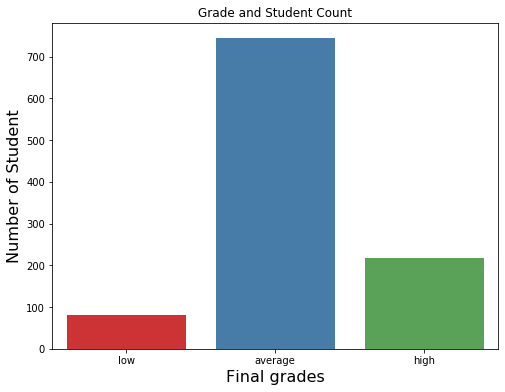

In [130]:
plt.figure(figsize=(8,6))
sns.countplot(stu["grades"], order=["low","average","high"],palette='Set1')
plt.title('Grade and Student Count')
plt.xlabel('Final grades',fontsize=16)
plt.ylabel('Number of Student',fontsize=16)

Text(0.5, 1, 'Correlation Heatmap')

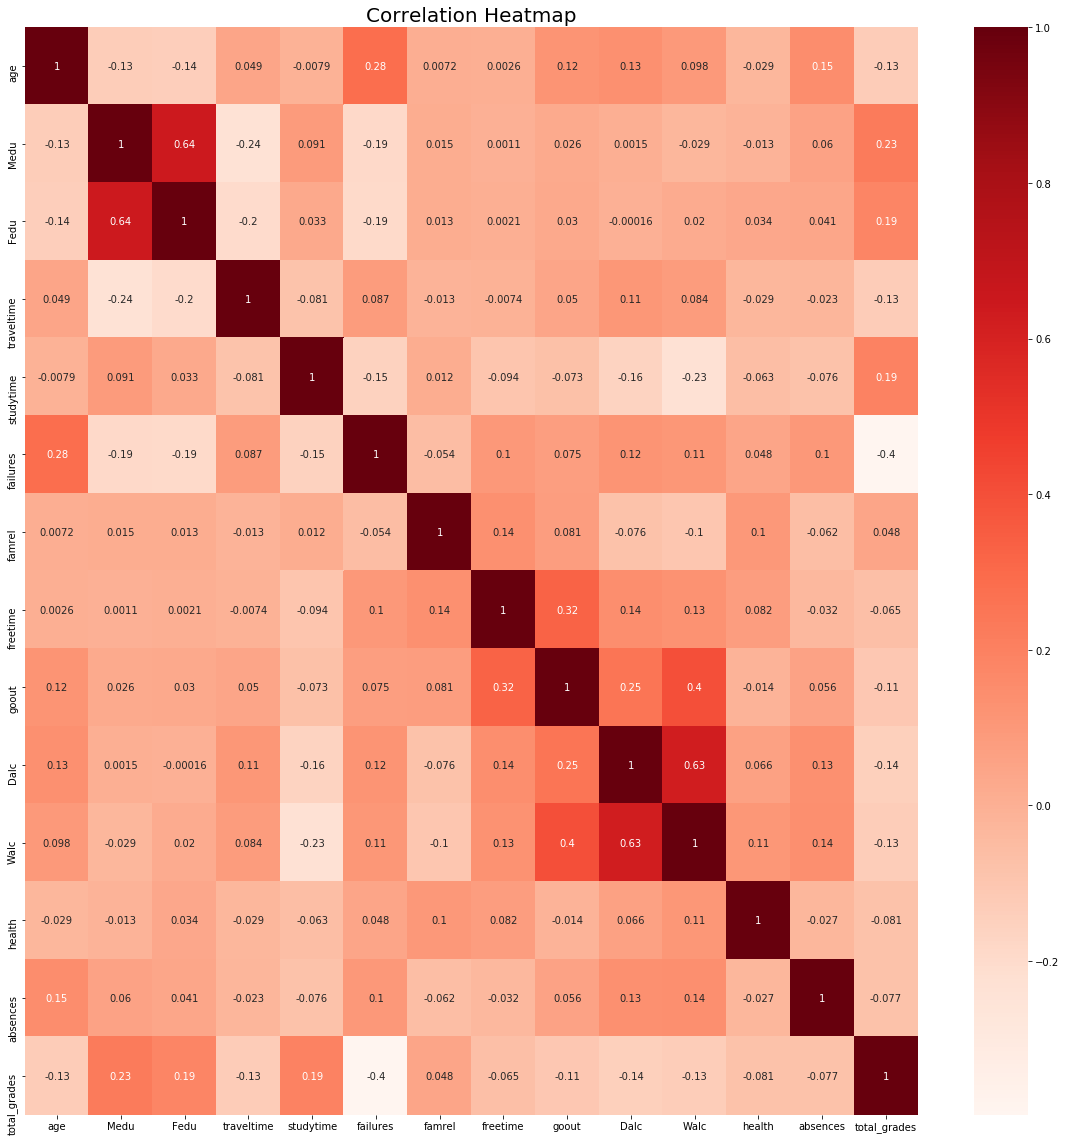

In [131]:
corr=stu.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap="Reds")
plt.title('Correlation Heatmap',fontsize=20)

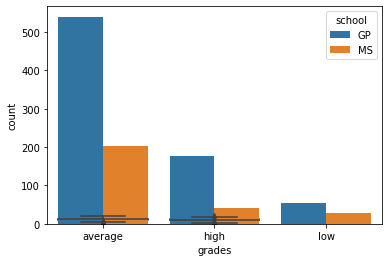

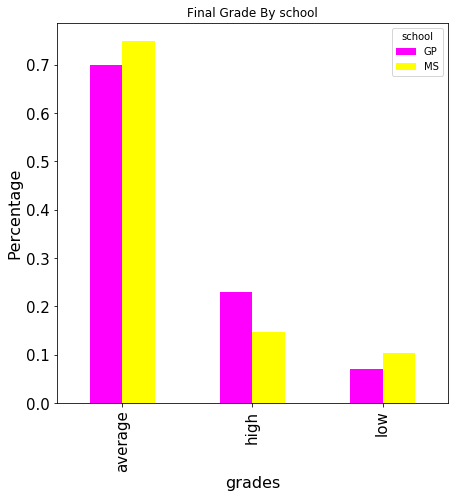

In [132]:
sns.boxplot(x="school",y="total_grades",data=stu)
school_counts=stu["school"].value_counts().to_frame()
school_counts.rename(columns={"school":"school_counts"},inplace=True)
school_counts.index.name='school'
school_sns=sns.countplot(hue=stu["school"],x=stu["grades"],data=stu)
perc=(lambda col:col/col.sum())
index=["average","high","low"]
schooltab1=pd.crosstab(columns=stu.school,index=stu.grades)
school_perc=schooltab1.apply(perc).reindex(index)
school_perc.plot.bar(colormap="spring",fontsize=15,figsize=(7,7))
plt.title('Final Grade By school')
plt.ylabel('Percentage',fontsize='16')
plt.xlabel('grades',fontsize='16')
plt.show()

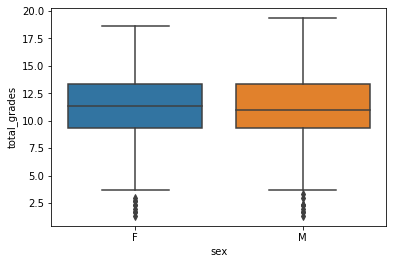

In [133]:
sns.boxplot(x="sex", y="total_grades", data=stu)

In [134]:
school_counts=stu["sex"].value_counts()
school_counts

F    591
M    453
Name: sex, dtype: int64

In [135]:
stu=stu.drop(["sex"],axis=1)

In [136]:
stu.head()

,school,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,total_grades,grades
0,GP,18,U,GT3,A,4,4,at_home,teacher,course,...,no,4,3,4,1,1,3,4,7.333333,average
1,GP,17,U,GT3,T,1,1,at_home,other,course,...,no,5,3,3,1,1,3,2,10.333333,average
2,GP,15,U,LE3,T,1,1,at_home,other,other,...,no,4,3,2,2,3,3,6,12.333333,average
3,GP,15,U,GT3,T,4,2,health,services,home,...,yes,3,2,2,1,1,5,0,14.000000,high
4,GP,16,U,GT3,T,3,3,other,other,home,...,no,4,3,2,1,2,5,0,12.333333,average


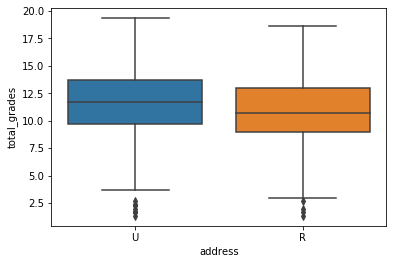

In [137]:
sns.boxplot(x="address",y="total_grades",data=stu)

In [138]:
index=["average","high","low"]
stu["address"].value_counts()

U    759
R    285
Name: address, dtype: int64

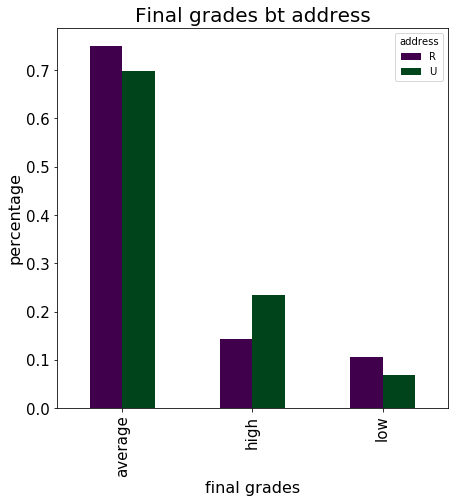

In [139]:
addresstab1=pd.crosstab(columns=stu.address,index=stu.grades)
address_perc=addresstab1.apply(perc).reindex(index)
address_perc.plot.bar(colormap="PRGn", fontsize=15,figsize=(7,7))
plt.title("Final grades bt address",fontsize=20)
plt.ylabel('percentage',fontsize=16)
plt.xlabel('final grades',fontsize=16)
plt.show()

comparing famsize with grades

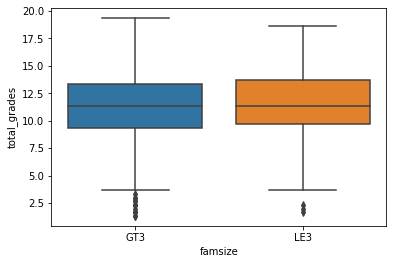

In [140]:
sns.boxplot(x="famsize",y="total_grades",data=stu)

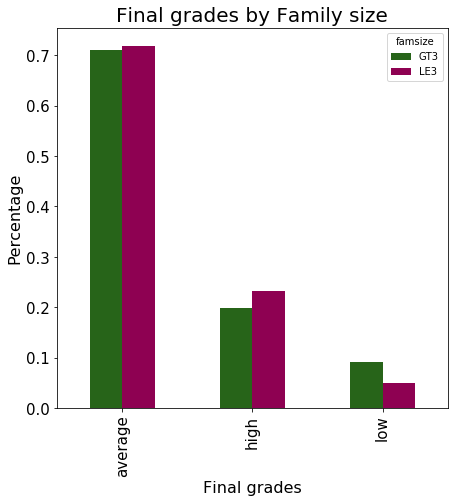

In [141]:
famsizetab1=pd.crosstab(columns=stu.famsize,index=stu.grades)
famsize_perc=famsizetab1.apply(perc).reindex(index)
famsize_perc.plot.bar(colormap="PiYG_r",fontsize=15,figsize=(7,7))
plt.title('Final grades by Family size',fontsize=20)
plt.ylabel('Percentage',fontsize=16)
plt.xlabel('Final grades',fontsize=16)
plt.show()

Comparing Pstatus with grades

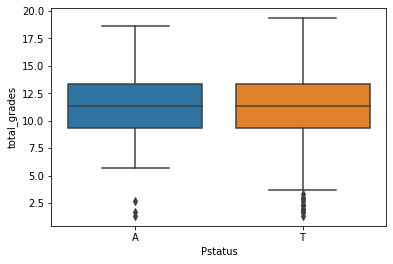

In [143]:
sns.boxplot(x="Pstatus",y="total_grades",data=stu)

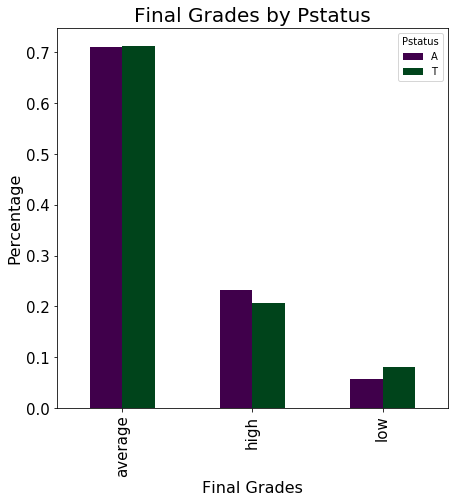

In [144]:
Pstatustab1=pd.crosstab(columns=stu.Pstatus,index=stu.grades)
Pstatus_perc=Pstatustab1.apply(perc).reindex(index)
Pstatus_perc.plot.bar(colormap="PRGn",fontsize=15,figsize=(7,7))
plt.title("Final Grades by Pstatus",fontsize=20)
plt.ylabel("Percentage",fontsize=16)
plt.xlabel("Final Grades",fontsize=16)
plt.show()
# A= Apart
# T= Together

Comparing Parents' Jobs

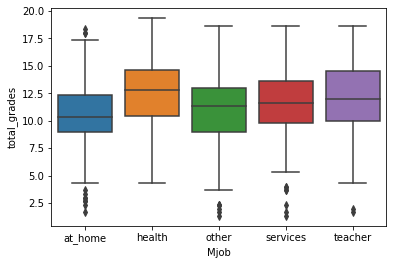

In [145]:
sns.boxplot(x="Mjob",y="total_grades",data=stu)

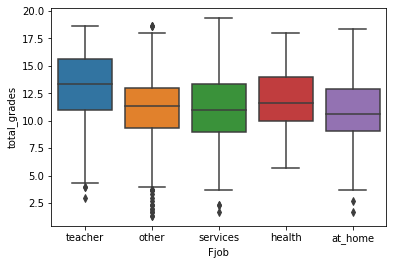

In [146]:
sns.boxplot(x="Fjob",y="total_grades",data=stu)

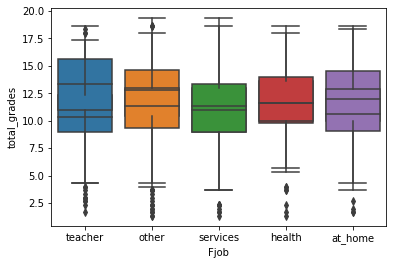

In [147]:
sns.boxplot(x="Mjob",y="total_grades",data=stu)
sns.boxplot(x="Fjob",y="total_grades",data=stu)
#wow that's crazy, Parents' job has a great impact

In [148]:
stu1=stu[["Fjob","Mjob","total_grades"]]
job_grp=stu1.groupby(['Mjob','Fjob'], as_index=False).mean()
job_pivot=job_grp.pivot(index='Mjob',columns='Fjob',values='total_grades')

In [149]:
job_grp

,Mjob,Fjob,total_grades
0,at_home,at_home,12.000000
1,at_home,health,11.250000
2,at_home,other,10.309091
3,at_home,services,10.176471
4,at_home,teacher,6.833333
5,health,at_home,9.000000
6,health,health,13.355556
7,health,other,12.263158
8,health,services,12.320000
9,health,teacher,14.111111


In [150]:
job_pivot

Fjob,at_home,health,other,services,teacher
Mjob,,,,,
at_home,12.000000,11.250000,10.309091,10.176471,6.833333
health,9.000000,13.355556,12.263158,12.320000,14.111111
other,10.105263,11.333333,10.989547,10.950450,11.523810
services,9.794872,10.458333,11.900000,11.215686,13.604167
teacher,11.166667,11.518519,11.578231,11.800000,13.833333


Comparing reasons

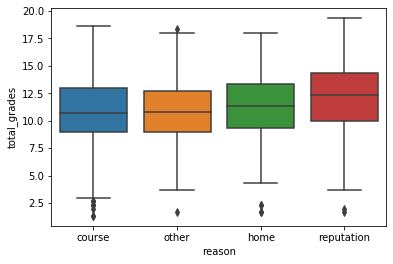

In [152]:
sns.boxplot(x="reason",y="total_grades",data=stu)
#it has some impact on the results

Comparing Gaurdians

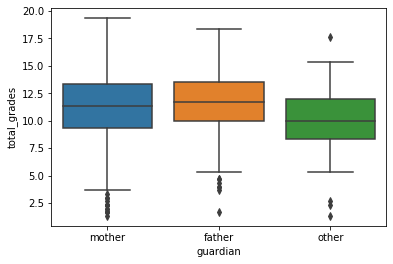

In [153]:
sns.boxplot(x="guardian",y="total_grades",data=stu)
# gaurdian has impact too!

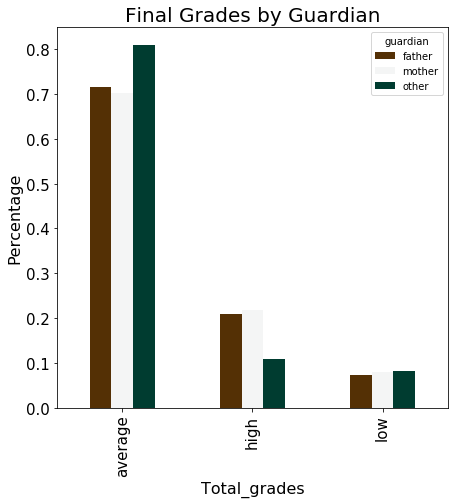

In [155]:
guardiantab1=pd.crosstab(columns=stu.guardian,index=stu.grades)
guardian_perc=guardiantab1.apply(perc).reindex(index)
guardian_perc.plot.bar(colormap='BrBG',fontsize=15,figsize=(7,7))
plt.title('Final Grades by Guardian',fontsize=20)
plt.ylabel('Percentage',fontsize=16)
plt.xlabel('Total_grades',fontsize=16)
plt.show()

Family and School Support

In [ ]:
sns.boxplot(x="schoolsup",y="total_grades",data=stu)
sns.boxplot(x="famsup",y="total_grades",data=stu)